In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('car data.csv',sep=',')


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
for feature in ['Seller_Type','Transmission','Owner']:
    print(feature,':',data[feature].unique())

Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']
Owner : [0 1 3]


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.drop('Car_Name',inplace=True,axis=1)

In [9]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
data['NumYear']=2020-data['Year']

In [11]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NumYear
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [12]:
data.drop('Year',axis=1,inplace=True)

In [13]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NumYear
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [14]:
data=pd.get_dummies(data,drop_first=True)

In [15]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,NumYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Selling_Price             301 non-null float64
Present_Price             301 non-null float64
Kms_Driven                301 non-null int64
Owner                     301 non-null int64
NumYear                   301 non-null int64
Fuel_Type_Diesel          301 non-null uint8
Fuel_Type_Petrol          301 non-null uint8
Seller_Type_Individual    301 non-null uint8
Transmission_Manual       301 non-null uint8
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [17]:
import seaborn as sns
sns.pairplot(data)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

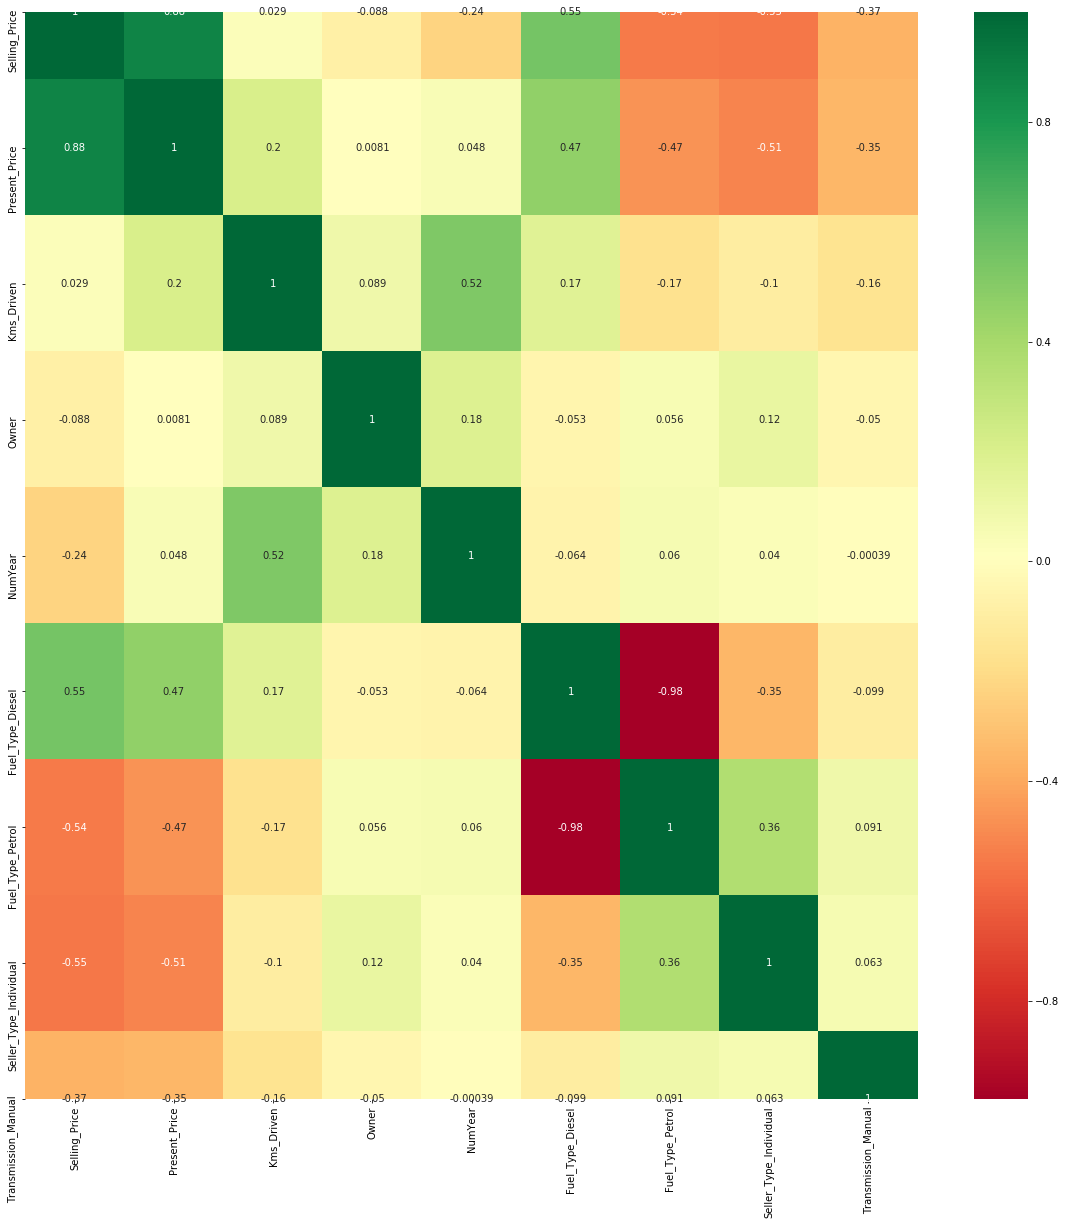

In [19]:
corr=data.corr().index
plt.figure(figsize=(20,20))
graph=sns.heatmap(data[corr].corr(),annot=True,cmap="RdYlGn")

In [21]:
X=data.drop('Selling_Price',axis=1)
Y=data['Selling_Price'].values

In [22]:
#feauture impotance
from sklearn.ensemble import ExtraTreesRegressor

In [35]:
model=ExtraTreesRegressor()
model.fit(X,Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [36]:
model.feature_importances_

array([0.33013534, 0.04284729, 0.00034934, 0.07772374, 0.2267289 ,
       0.01217409, 0.14782441, 0.16221689])

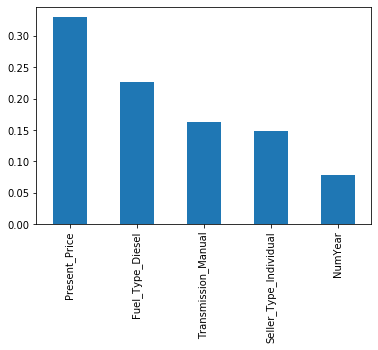

In [37]:
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest(5).plot(kind='bar')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestRegressor


In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Randomize search cv 

#number of trees in random forest 
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12) ]

#Number of features to consider of every split
max_features=['auto','sqrt']

#Maximum number of level in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]

#maximum number of sample required to split the node
min_sample_split=[2,5,10,15,100]

#minimum number of required of each leaf node
min_sample_leaf=[1,2,5,10]



In [52]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf':min_sample_leaf,
}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [53]:
rf=RandomForestRegressor()

In [54]:
randomize_search=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',
                                    n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)


In [55]:
randomize_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [57]:
prediction=randomize_search.predict(x_test)

In [58]:
prediction

array([ 5.17791,  8.98814, 20.07885, 12.32966,  3.15115, 11.29647,
        2.76435,  5.26233,  3.76963,  3.7291 ,  9.61736,  6.73605,
        0.28073,  0.49719,  0.57856,  0.97434,  4.66809,  0.57601,
        3.56791,  1.0944 ,  1.20451,  0.49248,  5.6243 ,  4.17593,
        0.32518,  1.29507, 20.80791,  6.56204,  2.87319,  0.59794,
        0.58494,  5.97648,  0.34395,  0.63333,  5.81165,  4.3899 ,
        5.39755,  4.31815,  0.2283 ,  3.13289,  0.54673,  4.10025,
        5.3262 ,  0.50923,  6.47142,  3.96096,  5.75601,  4.96099,
        5.48098,  0.36668,  8.68194,  1.00187,  1.17822,  0.48803,
        0.54454,  5.45789,  0.45093,  7.33955,  5.77015,  0.68278,
        1.37496])

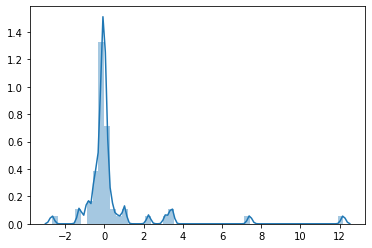

In [61]:
sns.distplot(y_test-prediction)

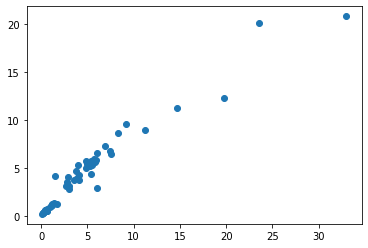

In [62]:
plt.scatter(y_test,prediction)

In [63]:
import pickle

In [65]:
file=open('RandomForestModel.pkl','wb')
pickle.dump(randomize_search,file)